### Extraer

In [ ]:
import polars as pl

### Seleccionar los campos a utilizar

In [58]:
matricula = (
    pl.read_csv('./data/Matricula/peru_student_enrollment_data_2023.csv', separator=';')
    .select(
        pl.col('TUITION PAYMENT MARCH 2022').alias('payment_2022'),
        pl.col('TUITION PAYMENT MARCH 2023').alias('payment_2023'),
        pl.col('GENDER').alias('gender'),
        pl.col('PROGRAM/MAJOR').alias('degree_program'),
        pl.col('STUDY MODE').alias('study_mode'),
        pl.col('NUMBER OF ENROLLED COURSES').alias('num_courses'),
        pl.col('AT-RISK COURSE').alias('risk_course'),
    )
)

In [59]:
matricula.head()

payment_2022,payment_2023,gender,degree_program,study_mode,num_courses,risk_course
i64,i64,str,str,str,i64,i64
0,0,"""M""","""ING. DE REDES Y COMUNICACIONES""","""Presencial""",0,0
1,0,"""M""","""ING. DE SISTEMAS""","""Presencial""",3,0
1,1,"""F""","""DERECHO""","""Presencial""",1,0
0,0,"""F""","""ADMINISTRACION DE NEGOCIOS (50…","""Presencial""",0,0
1,1,"""F""","""ADM. DE NEGOCIOS INTERNACIO""","""Presencial""",2,0


### Verificar si contienen nulos

In [60]:
matricula.null_count().sum()

payment_2022,payment_2023,gender,degree_program,study_mode,num_courses,risk_course
u32,u32,u32,u32,u32,u32,u32
0,0,2,1,0,0,0


In [61]:
# obtener el valor más común
program = matricula["degree_program"].mode()
print(matricula["degree_program"].mode())

gender = matricula["gender"].mode()
print(matricula["gender"].mode())

shape: (1,)
Series: 'degree_program' [str]
[
	"DERECHO"
]
shape: (1,)
Series: 'gender' [str]
[
	"M"
]


In [62]:
# Manejar nulos en campos texto
matricula = matricula.with_columns(
    [
        pl.col('gender').fill_null(gender), 
        pl.col('degree_program').fill_null(program)
    ] 
)
matricula.head()

payment_2022,payment_2023,gender,degree_program,study_mode,num_courses,risk_course
i64,i64,str,str,str,i64,i64
0,0,"""M""","""ING. DE REDES Y COMUNICACIONES""","""Presencial""",0,0
1,0,"""M""","""ING. DE SISTEMAS""","""Presencial""",3,0
1,1,"""F""","""DERECHO""","""Presencial""",1,0
0,0,"""F""","""ADMINISTRACION DE NEGOCIOS (50…","""Presencial""",0,0
1,1,"""F""","""ADM. DE NEGOCIOS INTERNACIO""","""Presencial""",2,0


In [63]:
matricula.null_count().sum()

payment_2022,payment_2023,gender,degree_program,study_mode,num_courses,risk_course
u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0


### Transformar el genero en el mismo formato 1=M y 2=F

In [64]:
matricula.select("gender").unique()

gender
str
"""M"""
"""F"""
"""U"""
"""1"""
"""2"""


In [15]:
matricula = matricula.with_columns(
    pl.col("gender").str.replace_many({"1": "M", "2": "F"})
)
matricula.head()

payment_2022,payment_2023,gender,degree_program,study_mode,num_courses,risk_course
i64,i64,str,str,str,i64,i64
0,0,"""M""","""ING. DE REDES Y COMUNICACIONES""","""Presencial""",0,0
1,0,"""M""","""ING. DE SISTEMAS""","""Presencial""",3,0
1,1,"""F""","""DERECHO""","""Presencial""",1,0
0,0,"""F""","""ADMINISTRACION DE NEGOCIOS (50…","""Presencial""",0,0
1,1,"""F""","""ADM. DE NEGOCIOS INTERNACIO""","""Presencial""",2,0


In [16]:
matricula.select("gender").unique()

gender
str
"""F"""
"""U"""
"""M"""


Questions to Answer:

- How has tuition payment changed from 2022 to 2023?
- What are the top 10 most popular majors among women compared to men?
- What is students' preference when choosing the study mode?
- Do students taking more courses have a higher risk of failing?

In [102]:
%pip install ipyvizzu

  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
Using cached typing_extensions-4.12.2-py3-none-any.whl (37 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [110]:
%pip install pandas

  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.2.3-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached pytz-2025.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl (11.5 MB)
Using cached numpy-2.2.3-cp312-cp312-win_amd64.whl (12.6 MB)
Using cached pytz-2025.1-py2.py3-none-any.whl (507 kB)
Using cached tzdata-2025.1-py2.py3-none-any.whl (346 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [131]:
%pip install matplotlib

  Using cached matplotlib-3.10.1-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.56.0-cp312-cp312-win_amd64.whl.metadata (103 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.1.0-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.1-cp312-cp312-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl (220 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.56.0-cp312-cp312-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl (71 kB)
Using cached pillow-11.1.0-cp312-cp312-win_amd64.whl (2.6 MB)
Using cached pyparsing-3.2.1-py3-none-any.whl (107 kB)
Note: you may need to restart the kernel to use updated packages.


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Cambio en el pago de matrícula de 2022 a 2023

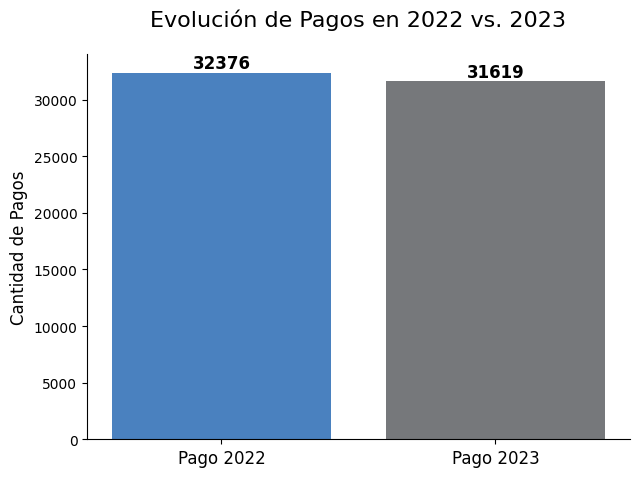

In [37]:
import matplotlib.pyplot as plt
import numpy as np

payment_counts = matricula.select(["payment_2022", "payment_2023"]).sum().to_dicts()[0]

# Posición de las barras
x = np.arange(len(payment_counts))

# Tamaño del gráfico
plt.figure(figsize=(7, 5))

# Dibujar barras con colores recomendados
colors = ["#4A81BF", "#76787B"]
plt.bar(x, list(payment_counts.values()), color=colors)

# Etiquetas y títulos
plt.xticks(x, ["Pago 2022", "Pago 2023"], fontsize=12)
plt.ylabel("Cantidad de Pagos", fontsize=12)
plt.title("Evolución de Pagos en 2022 vs. 2023", fontsize=16, pad=20)

# Agregar texto descriptivo dentro de las barras
for i, count in enumerate(payment_counts.values()):
    plt.text(i, count + 400, f"{count}", ha="center", fontsize=12, fontweight="bold", color="black")

# Quitar bordes innecesarios
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

# Mostrar gráfico  
plt.show()

In [189]:
matricula.select(["payment_2022", "payment_2023"]).sum()

payment_2022,payment_2023
i64,i64
32376,31619
